# Gradient Descent 

## Problem 1: Implement the gradient descent algorithm

In [1]:
# Imports
import sklearn
import sklearn.datasets
import sklearn.linear_model as lm
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Gradient Descent 
# (X, Y) -> our data set's dimensions
# T -> number of steps
# alpha -> step size

def gradient_descent(X, y, steps, alpha): 
    m, n = X.shape       
    theta = np.zeros(n)  
    cost = np.zeros(steps)   
    
    for i in range(steps):  
        cost[i] = 0.5*np.linalg.norm(X.dot(theta) - y)**2
        theta = theta - alpha*(X.T.dot(X.dot(theta) - y))
    return theta, cost

## Problem 2: Derive the gradient descent algorithm

Given Gradient Descent update equation:

# $\theta =   \theta - \alpha \sum_{i=1}^{m}(h_{\theta} (x_{i}) - y_{i})x_{i}$

From the definition of log odds we obtain:

## $h_{\theta}(x) = \frac{1}{1 + e^{- \theta T x}} , log \frac{h_{\theta}(x)}{1 - {h_{\theta}}(x)} -  = \theta_{0} + \theta_{1} x_{1}+ ... + \theta_{n} x_{n}$

Now we need to use a logarithmic function to represent the cost of logistic regression

 #  $ N(a)=   \left\{
\begin{array}{ll}
      -log(h_\theta(x)) & y = 1 \\
      -log(1 - h_\theta(x)) & y = 0 \\
\end{array} 
\right.  $

If we were to graph this function what we would see is that for y = 1, the cost is 0 for $h_\theta(x) = 1$ and if y = 0, the cost is 0 for $h_\theta(x) = 0$


So we simplify:

## $cost(h_{\theta}, y) = -y^{i} \times log(h_\theta(x^i)) - ( 1 - y^i) \times log(h_\theta(x^i)) $

So if we were to now calculate the cost for m observations:

### $J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{i} \times log(h_\theta(x^i)) - ( 1 - y^i) \times log(h_\theta(x^i))]$

So now we apply gradient descent to the cost function. We do this because gradient descent finds the minimum of a differentiable function.

$min J(\theta)$


Now we use the sigmoid function as the hypothesis function. Lets assume we have n features total, this means we get n params for the $\theta$ vector. So to minimize, we need to run a gradient descent on each parameter $\theta_j$. This gives us something like this:

# $\theta_j = \theta_j - \alpha \frac{\partial}{\partial\theta_j} J(\theta)$

Now, we need to update each parameter for each iteration:

# $\frac{\partial}{\partial\theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(h_{\theta} (x_{i}) - y_{i})x_{i} $

Now we plug in our gradient descent formula

# $\theta_j = \theta_j - \alpha\frac{1}{m} \sum_{i=1}^{m}(h_{\theta} (x_{i}) - y_{i})x_{i} J(\theta)$

rewritten as given update equation:

# $\theta =   \theta - \alpha \sum_{i=1}^{m}(h_{\theta} (x_{i}) - y_{i})x_{i}$

## Problem 3: Implement a batch or stochastic versions for multiple logistic regression

### A batch version of gradient descent for multiple logistic regression

In [3]:
# (X, Y) -> Our data set's dimensions
# steps: number of steps
# alpha: step size
def logistic_gradient_descent(X, Y, steps, alpha):
    # Same as before, get X dimensions and fill arrays with 0s
    m, n = X.shape          
    theta = np.zeros(n)     
    cost = np.zeros(steps)      
    
    for i in range(steps):
        #sigmoid
        p = (np.exp(X.dot(theta))/(1 + np.exp(X.dot(theta))))
        # Cost calculation
        cost[i] = (np.log(1 + np.exp(p.dot(Y))))
        # Next Theta
        theta = theta + alpha*X.T.dot(p-Y)
    return theta, cost

## Problem 4: Test your programs, simulate data from the linear regression and logistic regression models. 

In [4]:
#simulate data for linear regression

gen_data_x, gen_data_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)

#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]


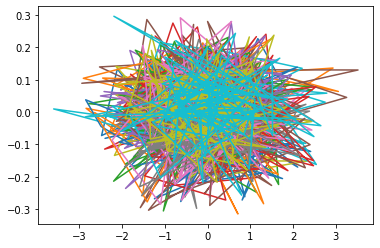

In [5]:
# a really bad estimator
# returns random vector as estimated parameters
dummy = np.ndarray([100, 20])
for index, row in enumerate(dummy):
    dummy[index] = np.random.normal(0, .1, 20)
plt.plot(gen_data_x, dummy)

# Try It Out!

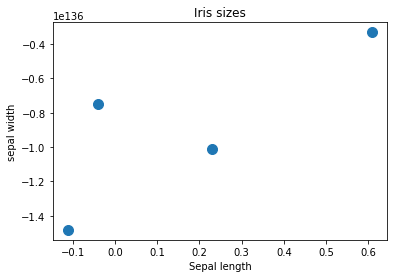

In [6]:
# Loading iris data set because it's small
iris = sklearn.datasets.load_iris()

# Lets get our X and Ys to plug into gradient descent
X = iris.data
Y = iris.target

# Get the tuple return from gradient descent 
theta_iris, cost_iris = gradient_descent(X, Y, 150 , 0.001)

# Fit Iris
reg_iris = sklearn.linear_model.LinearRegression()
reg_iris.fit(X, Y)
plt.title("Iris sizes")
plt.xlabel("Sepal length")
plt.ylabel("sepal width")
plt.plot(reg_iris.coef_, theta_iris, 'o', markersize = 10)

In [7]:
# Set up Classifications
(theta_lgd, cost_lgd) = logistic_gradient_descent(X,Y, 150, 0.001)
estimation = np.zeros(len(Y))
for i in range(len(X[0])):
    estimation += (X[..., i] * theta_lgd[i]) + cost_lgd

# Decision Tree Model
tree = sklearn.tree.DecisionTreeClassifier()

# Non - Linear SVM Model
nlsvm = sklearn.svm.NuSVC()

In [8]:
# 10-Cross-Fold-Test
ten_tree = sklearn.model_selection.cross_val_predict(tree, X, Y, cv=10)
stats.ttest_rel(ten_tree, estimation)

Ttest_relResult(statistic=55.04232793251985, pvalue=6.458282333008738e-101)

In [9]:
# 10-Cross-Fold-Test
scores_NSVM = sklearn.model_selection.cross_val_predict(nlsvm, X, Y,cv=10)
stats.ttest_rel(scores_NSVM, estimation)

Ttest_relResult(statistic=55.04125158667159, pvalue=6.47624855290482e-101)

In [10]:
# Evaluate models
models = [('Decision_Tree', sklearn.tree.DecisionTreeClassifier()), (('Non_Linear_SVM', sklearn.svm.NuSVC()))]

results, classifications = [], []

# Perform 10-fold cross-validation
for name, model in models:
    results.append(sklearn.model_selection.cross_val_score(model, X, Y, cv=sklearn.model_selection.KFold(n_splits=10), scoring='accuracy'))
    classifications.append(name)
    
# Fix Scaling
X_scaled = sklearn.preprocessing.scale(X)

classification = (sklearn.linear_model.LogisticRegression()).fit(X_scaled,Y)

In [11]:
print(sklearn.metrics.accuracy_score(Y,classification.predict(X_scaled)))
print(sklearn.metrics.classification_report(Y,classification.predict(X_scaled)))


0.9733333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



The 10 cross fold tests above show a very low p-value which is good. The above data shows that we have a very high accuracy scores for each classification (0.9733). Therefore, we can conclude that our regression was fairly accurate. 